In [1]:
#Import the packages.
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
#Load the data set.
train_images = mnist.train_images()
train_lables = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
#Normalize the images.
train_images = (train_images/255)
test_images = (test_images/255)
#Flatten the images
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
#Print the shape.
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [4]:
#Bulid the model
model = Sequential()
model.add(Dense(128, activation='relu',input_dim=784))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
#Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
#Train the model
model.fit(
    train_images,
    to_categorical(train_lables),
    epochs = 10,
    batch_size=32
)

Epoch 1/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.2323 - accuracy: 0.9306
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0975 - accuracy: 0.9704
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0670 - accuracy: 0.9795
Epoch 4/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0521 - accuracy: 0.9829
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0403 - accuracy: 0.9869
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0339 - accuracy: 0.9885
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0279 - accuracy: 0.9910
Epoch 8/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0248 - accuracy: 0.9918
Epoch 9/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0204 - accuracy: 0.9930
Epoch 10/10
60000/60000 [=============================

In [7]:
#Evaluate the model
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 27us/step


[0.08850121992796557, 0.9801999926567078]

In [8]:
#Predict on the first 5 test_images
print("Predicted digits: ")
predictions = model.predict(test_images[:20])
print(np.argmax(predictions, axis = 1))
print("Original digits: ")
print(test_labels[:20])

Predicted digits: 
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Original digits: 
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


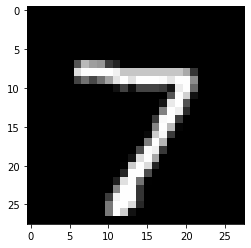

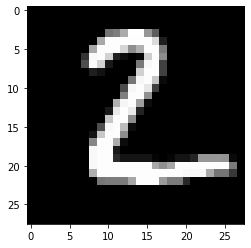

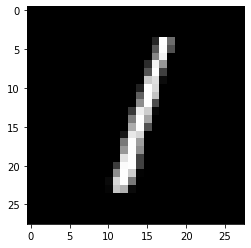

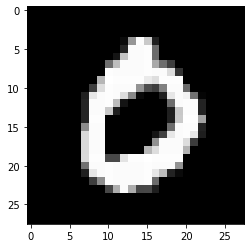

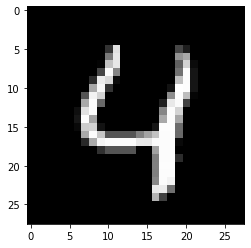

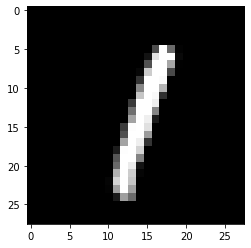

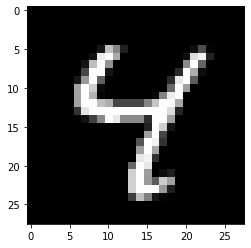

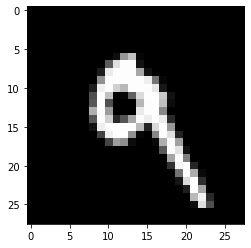

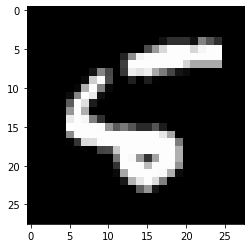

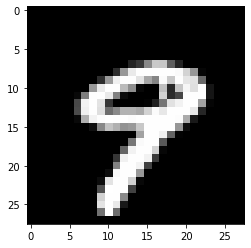

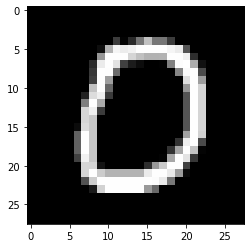

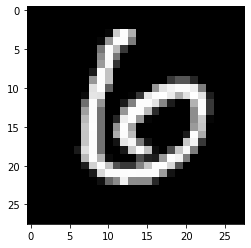

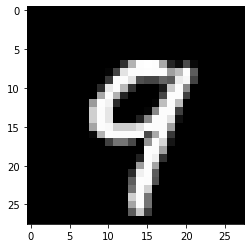

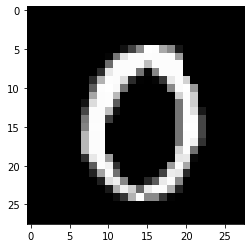

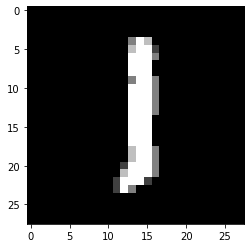

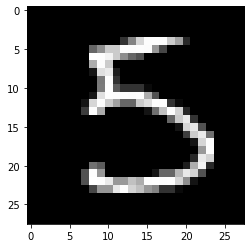

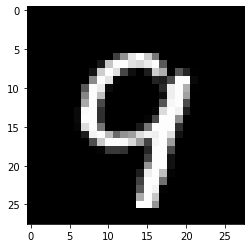

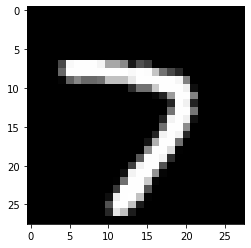

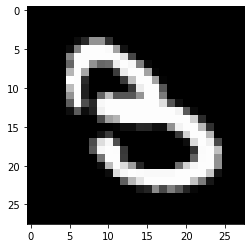

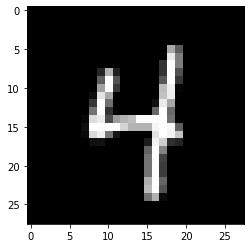

In [9]:
for i in range(0,20):
    first_image = test_images[i]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()